## Modelagem de absorvedores de membrana

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from macroscopic_models import delany_bazley, jca

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams["savefig.pad_inches"] = 0

In [26]:
# define frequency space
f_start = 20
f_end = 10000
f = np.arange(f_start, f_end, step=1)
omega = 2 * np.pi * f

# air properties
rho0 = 1.21  # [kg/m³] air density
c0 = 343  # [m/s] sound speed
k0 = omega / c0 # [rad / m] wave number

# porous material JCA properties
sigma = 15000 # [N*s/m^4] flux resistivity
tortuosity=1.01
porosity=0.98
viscous_characteristic_length=130e-6 # [m]

### 1. Variação da massa

### 1.1. Influência da espessura da membrana

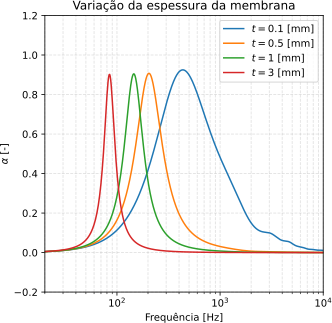

In [38]:
# membrane properties
D = 0.10  # [m] size of the air gap
membrane_thicknesses = np.array(
    [0.1e-3, 0.5e-3, 1e-3, 3e-3]
)  # [m] membrane thickness
rho_m = 1300  # [kg/m^3] specific mass of the membrane
surface_densities = membrane_thicknesses * rho_m  # [kg/m^2]

# porous material properties
d = 0.07  # [m] depth of porous material
Zp, kp = jca(
    f, sigma=sigma, tortuosity=tortuosity, porosity=porosity, viscous_characteristic_length=viscous_characteristic_length
)  # JCA parameters

# plot setup
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title(r"Variação da espessura da membrana")
ax.set_xlabel("Frequência [Hz]")
ax.set_ylabel(r"$\alpha$ [-]")
ax.set_xlim(f_start, f_end)
ax.set_ylim(-0.2, 1.2)
ax.grid(axis="both", which="both", linestyle="--", alpha=0.4)

labels = [
    r"$t = 0.1~[\text{mm}]$",
    r"$t = 0.5~[\text{mm}]$",
    r"$t = 1~[\text{mm}]$",
    r"$t = 3~[\text{mm}]$",
]

for surface_density, label in zip(surface_densities, labels):
    # estimating the ressonance frequency —— in reality, it will be somewhere between f50 and f60
    f50 = 50 / np.sqrt(surface_density * D)
    f60 = 60 / np.sqrt(surface_density * D)
    Zm = 1j * omega * surface_density  # membrane impedance

    # fmt: off
    Zsp = -1j*Zp / np.tan(kp*d) # impedance on top of the porous material layer
    Zsi = (((-1j*Zsp*rho0*c0) / (np.tan(k0*(D - d)))) + (rho0*c0)**2) / (Zsp - ((1j*rho0*c0) / (np.tan(k0*(D - d))))) # impedance on top of the air layer
    # fmt: on

    Zs = Zm + Zsi  # total impedance (series association)

    Vp = (Zs - (rho0 * c0)) / (Zs + (rho0 * c0))  # reflection coefficient
    alpha = 1 - (abs(Vp)) ** 2  # absorption coefficient
    ax.semilogx(f, alpha, label=label)
ax.legend()
plt.savefig("Apresentações/Etapa 2/imagens/membrana_variacao_espessura.svg", format="svg", bbox_inches="tight")
plt.show()

### 1.1. Influência do material da membrana

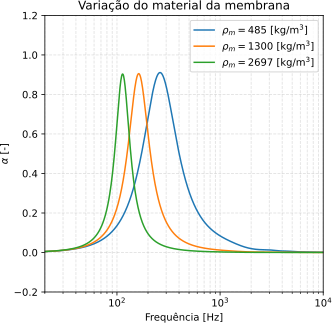

In [39]:
# membrane properties
D = 0.10  # [m] size of the air gap
membrane_thickness = 0.8e-3  # [m] membrane thickness
rho_m = np.array([485, 1300, 2697])  # [kg/m^3] specific mass of the membrane
surface_densities = membrane_thickness * rho_m  # [kg/m^2]

# porous material properties
d = 0.07  # [m] depth of porous material
Zp, kp = jca(
    f, sigma, tortuosity=tortuosity, porosity=porosity, viscous_characteristic_length=viscous_characteristic_length
)  # JCA parameters

# plot setup
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title(r"Variação do material da membrana")
ax.set_xlabel("Frequência [Hz]")
ax.set_ylabel(r"$\alpha$ [-]")
ax.set_xlim(f_start, f_end)
ax.set_ylim(-0.2, 1.2)
ax.grid(axis="both", which="both", linestyle="--", alpha=0.4)

labels = [
    r"$\rho_m = 485~[\text{kg/m}^3]$",
    r"$\rho_m = 1300~[\text{kg/m}^3]$",
    r"$\rho_m = 2697~[\text{kg/m}^3]$",
]


for surface_density, label in zip(surface_densities, labels):
    # estimating the ressonance frequency —— in reality, it will be somewhere between f50 and f60
    f50 = 50 / np.sqrt(surface_density * D)
    f60 = 60 / np.sqrt(surface_density * D)
    Zm = 1j * omega * surface_density  # membrane impedance

    # fmt: off
    Zsp = -1j*Zp / np.tan(kp*d) # impedance on top of the porous material layer
    Zsi = (((-1j*Zsp*rho0*c0) / (np.tan(k0*(D - d)))) + (rho0*c0)**2) / (Zsp - ((1j*rho0*c0) / (np.tan(k0*(D - d))))) # impedance on top of the air layer
    # fmt: on

    Zs = Zm + Zsi  # total impedance (series association)

    Vp = (Zs - (rho0 * c0)) / (Zs + (rho0 * c0))  # reflection coefficient
    alpha = 1 - (abs(Vp)) ** 2  # absorption coefficient
    ax.semilogx(f, alpha, label=label)
ax.legend()
plt.savefig("Apresentações/Etapa 2/imagens/membrana_variacao_material.svg", format="svg", bbox_inches="tight")
plt.show()

### 2. Variação da rigidez

#### 2.1. Influência do tamanho da cavidade

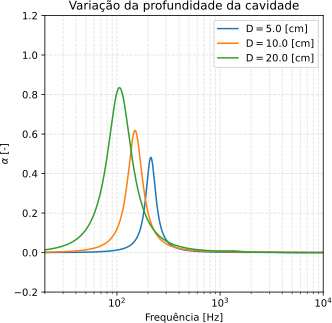

In [53]:
# membrane properties
cavity_sizes = np.array([0.05, 0.10, 0.20])  # [m] size of the air gap
surface_density = 1.3  # [kg/m^2]

# porous material properties
porous_sizes = cavity_sizes * 0.5  # [m] depth of porous material
Zp, kp = jca(
    f, sigma=sigma, tortuosity=tortuosity, porosity=porosity, viscous_characteristic_length=viscous_characteristic_length
)  # JCA parameters

# plot setup
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title(
    r"Variação da profundidade da cavidade"
)
ax.set_xlabel("Frequência [Hz]")
ax.set_ylabel(r"$\alpha$ [-]")
ax.set_xlim(f_start, f_end)
ax.set_ylim(-0.2, 1.2)
ax.grid(axis="both", which="both", linestyle="--", alpha=0.4)

labels = [
    r"$\text{D} = 5.0~[\text{cm}]$",
    r"$\text{D} = 10.0~[\text{cm}]$",
    r"$\text{D} = 20.0~[\text{cm}]$",
]

for (D, d, label) in zip(cavity_sizes, porous_sizes, labels):
    # estimating the ressonance frequency —— in reality, it will be somewhere between f50 and f60
    f50 = 50 / np.sqrt(surface_density * D)
    f60 = 60 / np.sqrt(surface_density * D)
    Zm = 1j * omega * surface_density  # membrane impedance

    # fmt: off
    Zsp = -1j*Zp / np.tan(kp*d) # impedance on top of the porous material layer
    Zsi = (((-1j*Zsp*rho0*c0) / (np.tan(k0*(D - d)))) + (rho0*c0)**2) / (Zsp - ((1j*rho0*c0) / (np.tan(k0*(D - d))))) # impedance on top of the air layer
    # fmt: on

    Zs = Zm + Zsi  # total impedance (series association)

    Vp = (Zs - (rho0 * c0)) / (Zs + (rho0 * c0))  # reflection coefficient
    alpha = 1 - (abs(Vp)) ** 2  # absorption coefficient
    ax.semilogx(f, alpha, label=label)
ax.legend()
plt.savefig("Apresentações/Etapa 2/imagens/membrana_variacao_cavidade.svg", format="svg", bbox_inches="tight")
plt.show()

#### 2.1. Influência do tamanho da camada de material poroso

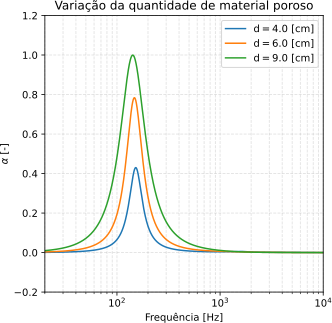

In [58]:
# membrane properties
D = 0.10  # [m] size of the air gap
surface_density = 1.3 # [kg/m^2]

# porous material properties
porous_sizes = np.array(
    [0.04, 0.06, 0.09]
)  # [m] depth of porous material
Zp, kp = jca(
    f, sigma=sigma, tortuosity=tortuosity, porosity=porosity, viscous_characteristic_length=viscous_characteristic_length
)  # JCA parameters

# plot setup
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title(
    r"Variação da quantidade de material poroso"
)
ax.set_xlabel("Frequência [Hz]")
ax.set_ylabel(r"$\alpha$ [-]")
ax.set_xlim(f_start, f_end)
ax.set_ylim(-0.2, 1.2)
ax.grid(axis="both", which="both", linestyle="--", alpha=0.4)

labels = [
    r"$\text{d} = 4.0~[\text{cm}]$",
    r"$\text{d} = 6.0~[\text{cm}]$",
    r"$\text{d} = 9.0~[\text{cm}]$",
]

for d, label in zip(porous_sizes, labels):
    # estimating the ressonance frequency —— in reality, it will be somewhere between f50 and f60
    f50 = 50 / np.sqrt(surface_density * D)
    f60 = 60 / np.sqrt(surface_density * D)
    Zm = 1j * omega * surface_density  # membrane impedance

    # fmt: off
    Zsp = -1j*Zp / np.tan(kp*d) # impedance on top of the porous material layer
    Zsi = (((-1j*Zsp*rho0*c0) / (np.tan(k0*(D - d)))) + (rho0*c0)**2) / (Zsp - ((1j*rho0*c0) / (np.tan(k0*(D - d))))) # impedance on top of the air layer
    # fmt: on

    Zs = Zm + Zsi  # total impedance (series association)

    Vp = (Zs - (rho0 * c0)) / (Zs + (rho0 * c0))  # reflection coefficient
    alpha = 1 - (abs(Vp)) ** 2  # absorption coefficient
    ax.semilogx(f, alpha, label=label)
ax.legend()
plt.savefig("Apresentações/Etapa 2/imagens/membrana_variacao_poroso.svg", format="svg", bbox_inches="tight")
plt.show()